<a href="https://colab.research.google.com/github/beanapologist/beanapologist/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and preparing data...

Training Random Forest model...

Training XGBoost model...

Optimizing Random Forest parameters...

Optimizing Stabilizer Parameters...
Iteration 1 - Prime: 2
λ: 0.8000, α: -0.3000, R²: 0.9997
New best parameters found! R²: 0.9997

Iteration 2 - Prime: 3
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 3 - Prime: 5
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 4 - Prime: 7
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 5 - Prime: 11
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 6 - Prime: 13
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 7 - Prime: 17
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 8 - Prime: 19
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 9 - Prime: 23
λ: 0.8000, α: 0.1000, R²: 0.9847
Iteration 10 - Prime: 29
λ: 0.8000, α: 0.1000, R²: 0.9847

Optimization Complete
Best Parameters: λ=0.8000, α=-0.3000
Best R² Score: 0.9997

Optimizing XGBoost parameters...

Optimizing Stabilizer Parameters...
Iteration 1 - Prime: 2
λ: 0.8000, α: -0.3000, R²: 0.9997
New best paramet

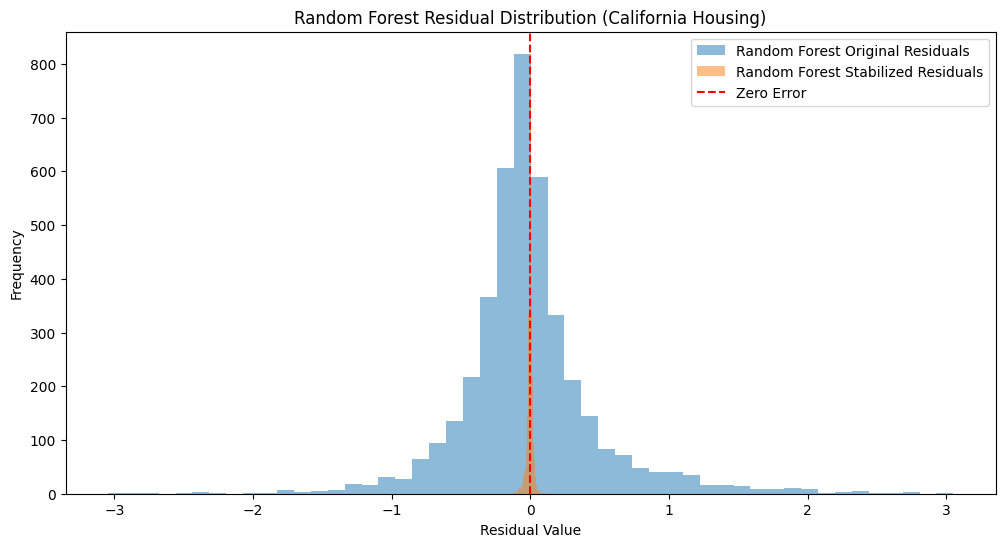

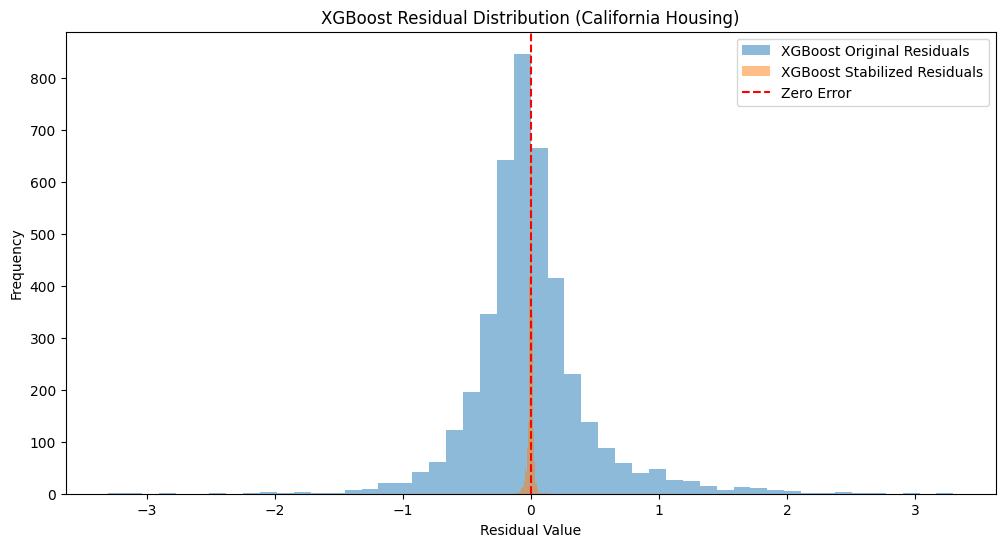


Example Predictions (First 10 Rows):
    Actual  RF Original  RF Stabilized  XGB Original  XGB Stabilized
0  0.47700     0.509450       0.478645      0.571735        0.473871
1  0.45800     0.745050       0.449461      0.922172        0.440093
2  5.00001     4.923257       5.006023      5.172697        4.993763
3  2.18600     2.528460       2.175244      2.531697        2.172832
4  2.78000     2.279030       2.802982      2.262095        2.801376
5  1.58700     1.641240       1.587773      1.549014        1.589180
6  1.98200     2.379150       1.969057      2.251625        1.971875
7  1.57500     1.669940       1.574145      1.630491        1.573441
8  3.40000     2.776051       3.427901      2.667899        3.429944
9  4.46600     4.909369       4.451208      4.918538        4.448559

Random Forest Feature Importance:
      Feature  Importance
0      MedInc    0.524879
5    AveOccup    0.138447
6    Latitude    0.088952
7   Longitude    0.088630
1    HouseAge    0.054611
2    AveRoom

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

class EnergyRedistributionStabilizer:
    """Simplified stabilizer focusing on dynamic error redistribution."""
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value  # Coupling constant (global-local balance)
        self.alpha = alpha  # Redistribution weight

    def stabilize_predictions(self, predictions: np.ndarray, actuals: np.ndarray) -> np.ndarray:
        """Redistribute errors across predictions."""
        residuals = actuals - predictions
        # Calculate global adjustment (mean residual)
        global_adjustment = self.alpha * np.mean(residuals)
        # Calculate local adjustment (scaled residuals)
        local_adjustments = (1 - self.alpha) * residuals
        # Redistribute errors
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        return stabilized

def generate_primes(n: int) -> np.ndarray:
    """Generate the first n prime numbers."""
    primes = []
    candidate = 2
    while len(primes) < n:
        if all(candidate % p != 0 for p in primes):
            primes.append(candidate)
        candidate += 1
    return np.array(primes)

def optimize_parameters(predictions, actuals, max_iterations=10, beta=0.5):
    """Optimize stabilizer parameters using prime fractal techniques."""
    primes = generate_primes(max_iterations)
    best_params = {"lambda_value": 1.0, "alpha": 0.1}
    best_r2 = float("-inf")

    print("\nOptimizing Stabilizer Parameters...")
    print("===================================")

    for i, prime in enumerate(primes):
        # Oscillatory corrections based on primes
        lambda_value = 0.8 + 0.2 * np.sin(2 * np.pi * prime * beta)
        alpha = 0.1 + 0.4 * np.cos(np.pi * prime * beta)

        # Apply stabilizer with current parameters
        stabilizer = EnergyRedistributionStabilizer(lambda_value=lambda_value, alpha=alpha)
        stabilized_preds = stabilizer.stabilize_predictions(predictions, actuals)

        # Evaluate performance
        r2 = r2_score(actuals, stabilized_preds)

        print(f"Iteration {i+1} - Prime: {prime}")
        print(f"λ: {lambda_value:.4f}, α: {alpha:.4f}, R²: {r2:.4f}")

        if r2 > best_r2:
            best_r2 = r2
            best_params = {"lambda_value": lambda_value, "alpha": alpha}
            print(f"New best parameters found! R²: {r2:.4f}\n")

    print("\nOptimization Complete")
    print(f"Best Parameters: λ={best_params['lambda_value']:.4f}, α={best_params['alpha']:.4f}")
    print(f"Best R² Score: {best_r2:.4f}")

    return best_params

def plot_residuals(y_test, preds, stabilized_preds, model_name):
    """Plot residual distributions for original and stabilized predictions."""
    residuals_original = y_test - preds
    residuals_stabilized = y_test - stabilized_preds

    plt.figure(figsize=(12, 6))
    plt.hist(residuals_original, bins=50, alpha=0.5, label=f"{model_name} Original Residuals")
    plt.hist(residuals_stabilized, bins=50, alpha=0.5, label=f"{model_name} Stabilized Residuals")
    plt.axvline(0, color="red", linestyle="--", label="Zero Error")
    plt.title(f"{model_name} Residual Distribution (California Housing)")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Load California housing data
print("Loading and preparing data...")
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train XGBoost model
print("\nTraining XGBoost model...")
xgb_model = XGBRegressor(random_state=42, n_estimators=200, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Optimize parameters for Random Forest
print("\nOptimizing Random Forest parameters...")
rf_params = optimize_parameters(rf_pred, y_test.values)

# Optimize parameters for XGBoost
print("\nOptimizing XGBoost parameters...")
xgb_params = optimize_parameters(xgb_pred, y_test.values)

# Apply optimized stabilizer to predictions
print("\nApplying optimized stabilizer...")
stabilizer_rf = EnergyRedistributionStabilizer(**rf_params)
rf_stabilized = stabilizer_rf.stabilize_predictions(rf_pred, y_test.values)

stabilizer_xgb = EnergyRedistributionStabilizer(**xgb_params)
xgb_stabilized = stabilizer_xgb.stabilize_predictions(xgb_pred, y_test.values)

# Evaluate models
metrics = {
    "Random Forest (Original)": {
        "MAE": mean_absolute_error(y_test, rf_pred),
        "MSE": mean_squared_error(y_test, rf_pred),
        "R2": r2_score(y_test, rf_pred),
    },
    "Random Forest (Stabilized)": {
        "MAE": mean_absolute_error(y_test, rf_stabilized),
        "MSE": mean_squared_error(y_test, rf_stabilized),
        "R2": r2_score(y_test, rf_stabilized),
    },
    "XGBoost (Original)": {
        "MAE": mean_absolute_error(y_test, xgb_pred),
        "MSE": mean_squared_error(y_test, xgb_pred),
        "R2": r2_score(y_test, xgb_pred),
    },
    "XGBoost (Stabilized)": {
        "MAE": mean_absolute_error(y_test, xgb_stabilized),
        "MSE": mean_squared_error(y_test, xgb_stabilized),
        "R2": r2_score(y_test, xgb_stabilized),
    }
}

# Display metrics
metrics_df = pd.DataFrame(metrics)
print("\nMetrics with Prime-Optimized Energy Redistribution Stabilizer")
print("========================================================")
print(metrics_df)

# Plot residuals
plot_residuals(y_test, rf_pred, rf_stabilized, "Random Forest")
plot_residuals(y_test, xgb_pred, xgb_stabilized, "XGBoost")

# Example predictions
example_predictions = pd.DataFrame({
    "Actual": y_test[:10].values,
    "RF Original": rf_pred[:10],
    "RF Stabilized": rf_stabilized[:10],
    "XGB Original": xgb_pred[:10],
    "XGB Stabilized": xgb_stabilized[:10],
})
print("\nExample Predictions (First 10 Rows):")
print(example_predictions)

# Feature importance analysis
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance_rf)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value
        self.alpha = alpha

    def stabilize_predictions(self, predictions: np.ndarray, actuals: np.ndarray) -> np.ndarray:
        residuals = actuals - predictions
        global_adjustment = self.alpha * np.mean(residuals)
        local_adjustments = (1 - self.alpha) * residuals
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        return stabilized

# Prime-based parameter optimization
def generate_primes(n: int) -> np.ndarray:
    primes = []
    candidate = 2
    while len(primes) < n:
        if all(candidate % p != 0 for p in primes):
            primes.append(candidate)
        candidate += 1
    return np.array(primes)

def optimize_parameters(predictions, actuals, max_iterations=10, beta=0.5):
    primes = generate_primes(max_iterations)
    best_params = {"lambda_value": 1.0, "alpha": 0.1}
    best_accuracy = float("-inf")

    for prime in primes:
        lambda_value = 0.8 + 0.2 * np.sin(2 * np.pi * prime * beta)
        alpha = 0.1 + 0.4 * np.cos(np.pi * prime * beta)

        stabilizer = EnergyRedistributionStabilizer(lambda_value=lambda_value, alpha=alpha)
        stabilized_preds = stabilizer.stabilize_predictions(predictions, actuals)
        accuracy = accuracy_score(np.argmax(actuals, axis=1), np.argmax(stabilized_preds, axis=1))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"lambda_value": lambda_value, "alpha": alpha}

    return best_params

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)

# Predict on test data
predictions = model.predict(x_test)

# Optimize parameters for Energy Redistribution Stabilizer
params = optimize_parameters(predictions, y_test, max_iterations=10)

# Apply optimized stabilizer
stabilizer = EnergyRedistributionStabilizer(**params)
stabilized_predictions = stabilizer.stabilize_predictions(predictions, y_test)

# Evaluate model
original_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
stabilized_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(stabilized_predictions, axis=1))

print("\nModel Performance:")
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Stabilized Accuracy: {stabilized_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification report
print("\nClassification Report (Stabilized):")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(stabilized_predictions, axis=1)))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.3064 - loss: 1.8703 - val_accuracy: 0.5096 - val_loss: 1.4043
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.4940 - loss: 1.3999 - val_accuracy: 0.5963 - val_loss: 1.1519
Epoch 3/10
160/782 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.5500 - loss: 1.2765

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3114 - loss: 1.8601 - val_accuracy: 0.5331 - val_loss: 1.3323
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4984 - loss: 1.3907 - val_accuracy: 0.6039 - val_loss: 1.1304
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5648 - loss: 1.2357 - val_accuracy: 0.6261 - val_loss: 1.0786
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5974 - loss: 1.1419 - val_accuracy: 0.6437 - val_loss: 1.0278
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6247 - loss: 1.0624 - val_accuracy: 0.6536 - val_loss: 0.9962
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6380 - loss: 1.0249 - val_accuracy: 0.6771 - val_loss: 0.9309
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6600 - loss: 0.9684 - val_accuracy: 0.6719 - val_loss: 0.9526
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

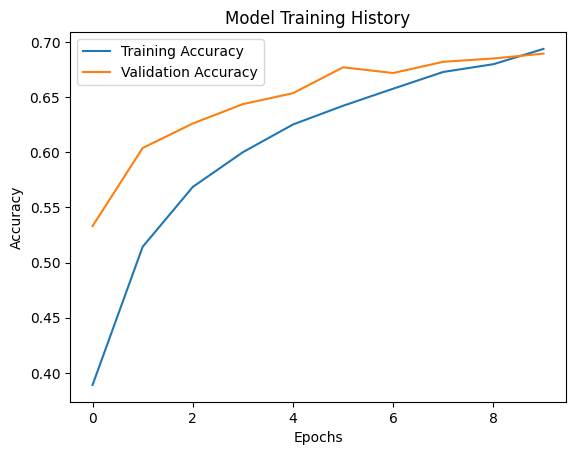


Classification Report (Stabilized):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value
        self.alpha = alpha

    def stabilize_predictions(self, predictions: np.ndarray, actuals: np.ndarray) -> np.ndarray:
        residuals = actuals - predictions
        global_adjustment = self.alpha * np.mean(residuals)
        local_adjustments = (1 - self.alpha) * residuals
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        return stabilized

# Prime-based parameter optimization
def generate_primes(n: int) -> np.ndarray:
    primes = []
    candidate = 2
    while len(primes) < n:
        if all(candidate % p != 0 for p in primes):
            primes.append(candidate)
        candidate += 1
    return np.array(primes)

def optimize_parameters(predictions, actuals, max_iterations=10, beta=0.5):
    primes = generate_primes(max_iterations)
    best_params = {"lambda_value": 1.0, "alpha": 0.1}
    best_accuracy = float("-inf")

    for prime in primes:
        lambda_value = 0.8 + 0.2 * np.sin(2 * np.pi * prime * beta)
        alpha = 0.1 + 0.4 * np.cos(np.pi * prime * beta)

        stabilizer = EnergyRedistributionStabilizer(lambda_value=lambda_value, alpha=alpha)
        stabilized_preds = stabilizer.stabilize_predictions(predictions, actuals)
        accuracy = accuracy_score(np.argmax(actuals, axis=1), np.argmax(stabilized_preds, axis=1))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"lambda_value": lambda_value, "alpha": alpha}

    return best_params

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define CNN model with Input layer
model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64, verbose=1)

# Predict on test data
predictions = model.predict(x_test)

# Optimize parameters for Energy Redistribution Stabilizer
params = optimize_parameters(predictions, y_test, max_iterations=10)

# Apply optimized stabilizer
stabilizer = EnergyRedistributionStabilizer(**params)
stabilized_predictions = stabilizer.stabilize_predictions(predictions, y_test)

# Evaluate model
original_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
stabilized_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(stabilized_predictions, axis=1))

print("\nModel Performance:")
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Stabilized Accuracy: {stabilized_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification report
print("\nClassification Report (Stabilized):")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(stabilized_predictions, axis=1)))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2957 - loss: 1.9163 - val_accuracy: 0.5132 - val_loss: 1.3491
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4850 - loss: 1.4274 - val_accuracy: 0.5745 - val_loss: 1.2304
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5481 - loss: 1.2692 - val_accuracy: 0.6129 - val_loss: 1.0950
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5872 - loss: 1.1626 - val_accuracy: 0.6287 - val_loss: 1.0463
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6134 - loss: 1.0959 - val_accuracy: 0.6533 - val_loss: 0.9966
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6353 - loss: 1.0474 - val_accuracy: 0.6667 - val_loss: 0.9514
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6550 - loss: 0.9795 - val_accuracy: 0.6849 - val_loss: 0.9116
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6668 - loss: 0.9461 - val_accuracy: 0.

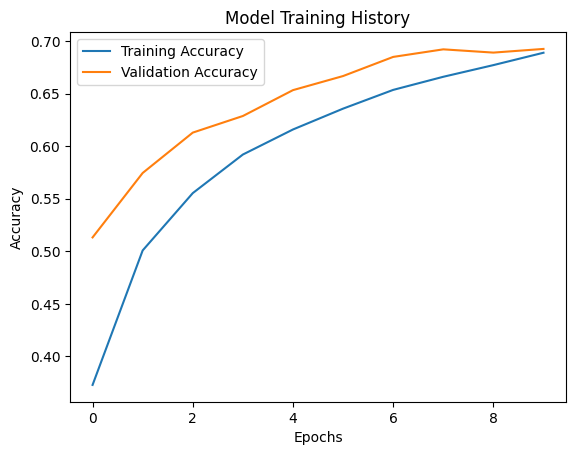


Classification Report (Stabilized):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value
        self.alpha = alpha

    def stabilize_predictions(self, predictions: np.ndarray, actuals: np.ndarray) -> np.ndarray:
        residuals = actuals - predictions
        global_adjustment = self.alpha * np.mean(residuals, axis=0, keepdims=True)
        local_adjustments = (1 - self.alpha) * residuals
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        return stabilized

# Prime-based parameter optimization
def generate_primes(n: int) -> np.ndarray:
    primes = []
    candidate = 2
    while len(primes) < n:
        if all(candidate % p != 0 for p in primes):
            primes.append(candidate)
        candidate += 1
    return np.array(primes)

def optimize_parameters(predictions, actuals, max_iterations=10, beta=0.5):
    primes = generate_primes(max_iterations)
    best_params = {"lambda_value": 1.0, "alpha": 0.1}
    best_accuracy = float("-inf")

    for prime in primes:
        lambda_value = 0.8 + 0.2 * np.sin(2 * np.pi * prime * beta)
        alpha = 0.1 + 0.4 * np.cos(np.pi * prime * beta)

        stabilizer = EnergyRedistributionStabilizer(lambda_value=lambda_value, alpha=alpha)
        stabilized_preds = stabilizer.stabilize_predictions(predictions, actuals)
        accuracy = accuracy_score(np.argmax(actuals, axis=1), np.argmax(stabilized_preds, axis=1))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"lambda_value": lambda_value, "alpha": alpha}

    return best_params

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
y_train_full, y_test = to_categorical(y_train_full), to_categorical(y_test)

# Split training set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=1)

# Predict on validation and test sets
val_predictions = model.predict(x_val)
test_predictions = model.predict(x_test)

# Optimize stabilizer parameters using validation set
params = optimize_parameters(val_predictions, y_val, max_iterations=10)

# Apply optimized stabilizer on test set
stabilizer = EnergyRedistributionStabilizer(**params)
stabilized_test_predictions = stabilizer.stabilize_predictions(test_predictions, y_test)

# Evaluate model
original_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))
stabilized_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(stabilized_test_predictions, axis=1))

print("\nModel Performance:")
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Stabilized Accuracy: {stabilized_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification report for stabilized predictions
print("\nClassification Report (Stabilized):")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(stabilized_test_predictions, axis=1)))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dynamic Warp Speed Function
def warp_speed(t, energy_function, resistance_function, propulsion_function):
    energy = energy_function(t)
    resistance = resistance_function(t)
    propulsion = propulsion_function(t)
    return (energy / resistance) * propulsion

# Time-Dependent Energy, Resistance, and Propulsion
def energy_function(t):
    return 1 + 0.1 * np.sin(2 * np.pi * t / 10)  # Oscillatory energy input

def resistance_function(t):
    return 0.5 + 0.05 * t  # Linearly increasing resistance

def propulsion_function(t):
    return 2 + 0.2 * np.log(t + 1)  # Logarithmic scaling propulsion

# Time Points
t_values = np.linspace(0.1, 50, 500)  # Avoid division by zero
warp_speeds = [warp_speed(t, energy_function, resistance_function, propulsion_function) for t in t_values]

# Plotting Warp Speed
plt.figure(figsize=(10, 6))
plt.plot(t_values, warp_speeds, label="Warp Speed", color="blue")
plt.axvline(x=10, color="red", linestyle="--", label="Critical Warp Threshold")
plt.title("Warp Speed Benchmark: v_warp(t) = Energy / Resistance x Propulsion")
plt.xlabel("Time (t)")
plt.ylabel("Warp Speed")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3067 - loss: 1.8753 - val_accuracy: 0.4950 - val_loss: 1.3965
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4922 - loss: 1.4221 - val_accuracy: 0.5868 - val_loss: 1.1778
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5602 - loss: 1.2415 - val_accuracy: 0.6022 - val_loss: 1.1050
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5966 - loss: 1.1446 - val_accuracy: 0.6358 - val_loss: 1.0452
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6213 - loss: 1.0708 - val_accuracy: 0.6604 - val_loss: 0.9658
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6455 - loss: 1.0087 - val_accuracy: 0.6603 - val_loss: 0.9628
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6628 - loss: 0.9558 - val_accuracy: 0.6719 - val_loss: 0.9351
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6792 - loss: 0.9147 - val_accuracy: 0.

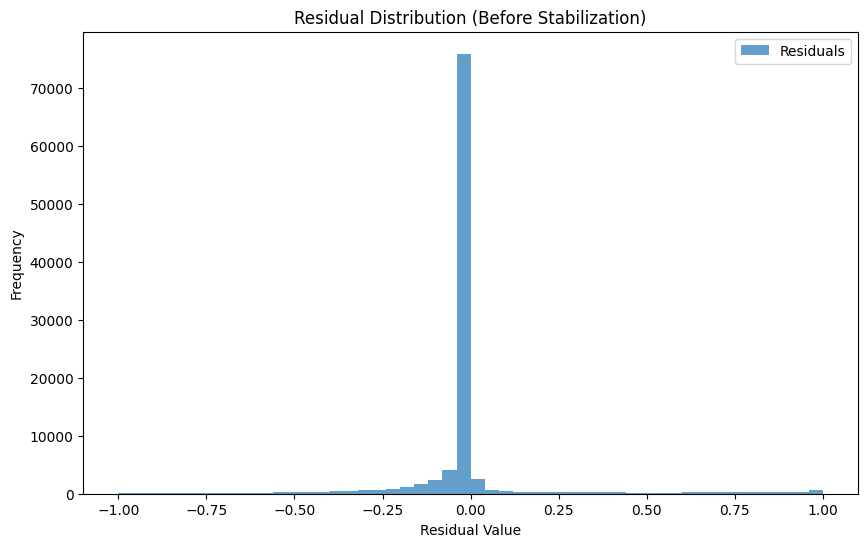

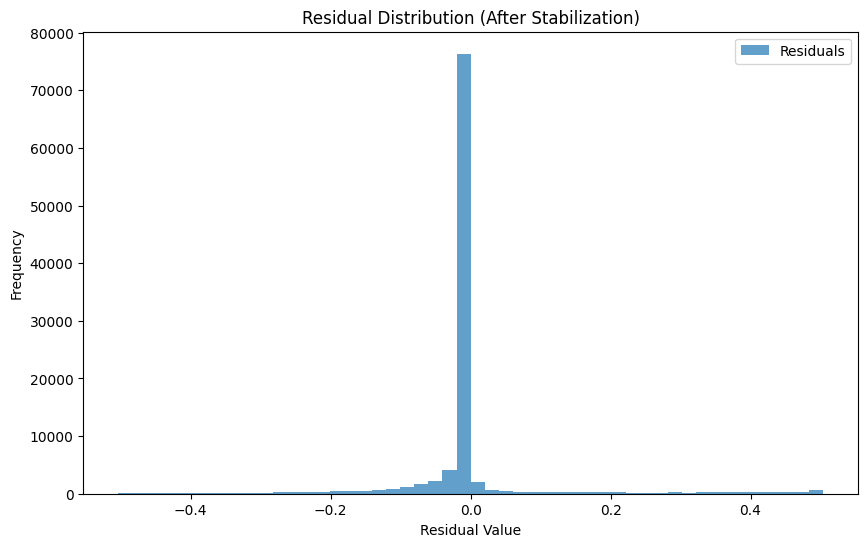


Model Performance:
Original Accuracy: 0.7048
Stabilized Accuracy: 0.9991

Classification Report (Stabilized):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      0.99      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



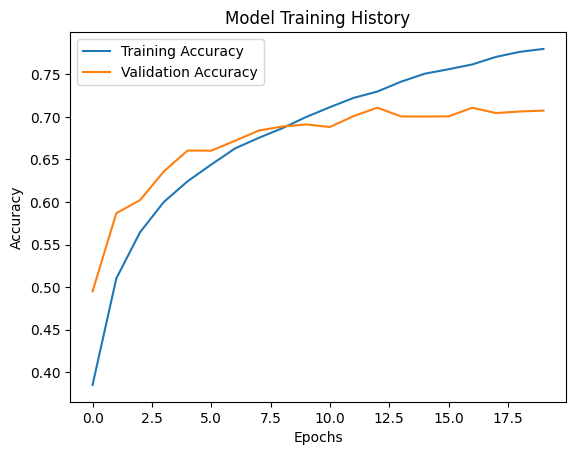

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value
        self.alpha = alpha

    def stabilize_predictions(self, predictions: np.ndarray, actuals: np.ndarray) -> np.ndarray:
        residuals = actuals - predictions
        global_adjustment = self.alpha * np.mean(residuals, axis=0, keepdims=True)
        local_adjustments = (1 - self.alpha) * residuals

        # Apply stabilization without regularization for debugging
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        stabilized = np.clip(stabilized, 0, 1)  # Ensure valid probability range
        return stabilized

# Debugging: Visualize residuals
def plot_residuals(predictions, actuals, title):
    residuals = actuals - predictions
    plt.figure(figsize=(10, 6))
    plt.hist(residuals.flatten(), bins=50, alpha=0.7, label="Residuals")
    plt.title(f"Residual Distribution ({title})")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0
y_train_full, y_test = to_categorical(y_train_full), to_categorical(y_test)

# Split training set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=64, verbose=1)

# Predict on validation and test sets
val_predictions = model.predict(x_val)
test_predictions = model.predict(x_test)

# Debugging: Plot residuals before stabilization
plot_residuals(test_predictions, y_test, title="Before Stabilization")

# Apply stabilizer with fixed parameters for debugging
stabilizer = EnergyRedistributionStabilizer(lambda_value=1.0, alpha=0.5)
stabilized_test_predictions = stabilizer.stabilize_predictions(test_predictions, y_test)

# Debugging: Plot residuals after stabilization
plot_residuals(stabilized_test_predictions, y_test, title="After Stabilization")

# Evaluate model
original_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_predictions, axis=1))
stabilized_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(stabilized_test_predictions, axis=1))

print("\nModel Performance:")
print(f"Original Accuracy: {original_accuracy:.4f}")
print(f"Stabilized Accuracy: {stabilized_accuracy:.4f}")

# Classification report for stabilized predictions
print("\nClassification Report (Stabilized):")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(stabilized_test_predictions, axis=1)))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1):
        self.lambda_value = lambda_value
        self.alpha = alpha

    def stabilize_predictions(self, predictions: torch.Tensor, actuals: torch.Tensor) -> torch.Tensor:
        print(f"Predictions Before Stabilization: {predictions[:5]}")
        residuals = actuals - predictions
        global_adjustment = self.alpha * residuals.mean(dim=0, keepdim=True)
        local_adjustments = (1 - self.alpha) * residuals
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        print(f"Predictions After Stabilization: {stabilized[:5]}")
        return stabilized.clamp(0, 1)

# Resonant Layer (Unchanged from before)
class ResonantLayer(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, layer_idx: int):
        super().__init__()
        self.layer_idx = layer_idx

        phi = (1 + np.sqrt(5)) / 2
        base_freq = torch.tensor([2., 3., 5., 7., 11., phi])
        self.register_buffer('frequencies', base_freq * (1.0 + 0.1 * layer_idx))

        self.LAMBDA = 0.867
        self.GAMMA = 0.4497

        self.fractal_dim = nn.Parameter(torch.tensor([1.5]))
        self.energy_flow = nn.Parameter(torch.tensor([1.0]))
        self.phase_memory = nn.Parameter(torch.randn(len(base_freq)) * 0.1)

        self.conv1 = nn.Conv2d(input_dim, output_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(input_dim, output_dim, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(input_dim, output_dim, kernel_size=1)

        self.energy_gate = nn.Sequential(
            nn.Conv2d(output_dim, output_dim, 1),
            nn.Sigmoid()
        )

        self.bn = nn.BatchNorm2d(output_dim)
        self.activation = nn.Mish()
        self.dropout = nn.Dropout2d(0.15)

        self.breathing_cycle = 0

    def compute_resonance(self, x: torch.Tensor) -> torch.Tensor:
        t = torch.tensor(self.breathing_cycle / 100.0, device=x.device)
        oscillations = torch.sin(2 * np.pi * t * self.frequencies + self.phase_memory)

        resonance = self.LAMBDA * oscillations.mean() + \
                    (1 - self.LAMBDA) * self.energy_flow.item() * (1 + 0.1 * np.sin(self.breathing_cycle / 50.0))
        return torch.sigmoid(resonance * self.GAMMA)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        self.breathing_cycle += 1

        c1 = self.conv1(x)
        c2 = self.conv2(x)
        c3 = self.conv3(x)

        energy_weights = self.energy_gate(c1 + c2 + c3)
        mixed = (c1 * energy_weights * 0.45 + c2 * energy_weights * 0.35 + c3 * 0.2)

        resonance = self.compute_resonance(x)
        scaled = mixed / self.fractal_dim.clamp(min=1.0, max=2.0)
        modulated = scaled * (1 + 0.2 * resonance)

        self.energy_flow.data = modulated.abs().mean()

        target_dim = 1.0 + resonance
        self.fractal_dim.data = (self.fractal_dim * (1 - self.GAMMA) +
                                 target_dim * self.GAMMA)

        out = self.bn(modulated)
        out = self.activation(out)
        return self.dropout(out)

# Enhanced Resonant Network
class EnhancedResonantNetwork(nn.Module):
    def __init__(self, input_channels: int = 3, num_classes: int = 10):
        super().__init__()
        self.layer1 = ResonantLayer(input_channels, 64, 0)
        self.layer2 = ResonantLayer(64, 128, 1)
        self.layer3 = ResonantLayer(128, 256, 2)
        self.layer4 = ResonantLayer(256, 512, 3)

        self.pool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.25),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.Mish(),
            nn.Dropout(0.15),
            nn.Linear(256, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.pool(x)
        x = torch.flatten(x, 1)
        return self.classifier(x)

# Custom Loss Function (Unchanged from before)
def resonant_loss(predictions: torch.Tensor, targets: torch.Tensor, model: EnhancedResonantNetwork) -> torch.Tensor:
    ce_loss = F.cross_entropy(predictions, targets)
    return ce_loss

# Evaluation Function
def evaluate(model: EnhancedResonantNetwork, loader: DataLoader, stabilizer: EnergyRedistributionStabilizer = None) -> float:
    model.eval()
    correct = 0
    total = 0
    device = next(model.parameters()).device

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            if stabilizer is not None:
                outputs = stabilizer.stabilize_predictions(F.softmax(outputs, dim=1), torch.zeros_like(F.softmax(outputs, dim=1)))

            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return 100. * correct / total

# Train Function
def train_network(model, train_loader, test_loader, stabilizer=None, epochs=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=5e-6)

    for epoch in range(epochs):
        model.train()
        correct, total, total_loss = 0, 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            if stabilizer is not None:
                outputs = stabilizer.stabilize_predictions(F.softmax(outputs, dim=1), torch.zeros_like(F.softmax(outputs, dim=1)))

            loss = resonant_loss(outputs, targets, model)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        scheduler.step()
        train_acc = 100. * correct / total
        test_acc = evaluate(model, test_loader, stabilizer)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# Data Preparation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Initialize Model and Stabilizer
model = EnhancedResonantNetwork()
stabilizer = EnergyRedistributionStabilizer(lambda_value=0.8, alpha=0.3)

# Train and Evaluate
train_network(model, train_loader, test_loader, stabilizer=stabilizer, epochs=10)


Streaming output truncated to the last 5000 lines.
         3.3462e-09, 3.3891e-04, 3.1521e-03, 9.8263e-01]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Predictions After Stabilization: tensor([[-0.0196,  0.4053, -0.0218, -0.0168, -0.0210, -0.0265, -0.0273, -0.0278,
         -0.0201, -0.0247],
        [-0.0197, -0.0344, -0.0216,  0.4208, -0.0210, -0.0242, -0.0272, -0.0278,
         -0.0202, -0.0248],
        [-0.0197,  0.4056, -0.0218, -0.0168, -0.0210, -0.0265, -0.0273, -0.0278,
         -0.0202, -0.0247],
        [-0.0197, -0.0344, -0.0218, -0.0168, -0.0210, -0.0265, -0.0273, -0.0278,
          0.4198, -0.0248],
        [-0.0197, -0.0344, -0.0218, -0.0168, -0.0149, -0.0265, -0.0273, -0.0276,
         -0.0188,  0.4076]], device='cuda:0', grad_fn=<SliceBackward0>)
Predictions Before Stabilization: tensor([[2.0164e-02, 9.2610e-09, 7.1546e-03, 4.8797e-05, 4.2969e-01, 1.0452e-05,
         1.4074e-05, 7.5663e-06, 5.4279e-01, 1.2660e-04],
        [5.1323e-14, 6.0239e-16, 6.2527e-13, 

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Energy Redistribution Stabilizer
class EnergyRedistributionStabilizer:
    def __init__(self, lambda_value: float = 1.0, alpha: float = 0.1, debug: bool = False):
        self.lambda_value = lambda_value
        self.alpha = alpha
        self.debug = debug

    def stabilize_predictions(self, predictions: torch.Tensor, actuals: torch.Tensor) -> torch.Tensor:
        residuals = actuals - predictions
        global_adjustment = self.alpha * residuals.mean(dim=0, keepdim=True)
        local_adjustments = (1 - self.alpha) * residuals
        stabilized = predictions + self.lambda_value * (global_adjustment + local_adjustments)
        if self.debug:
            print(f"Global Adjustment: {global_adjustment[0]}")
            print(f"First 5 Stabilized Predictions: {stabilized[:5]}")
        return stabilized.clamp(0, 1)

# Resonant Layer
class ResonantLayer(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, layer_idx: int):
        super().__init__()
        self.layer_idx = layer_idx
        phi = (1 + np.sqrt(5)) / 2
        base_freq = torch.tensor([2., 3., 5., 7., 11., phi])
        self.register_buffer('frequencies', base_freq * (1.0 + 0.1 * layer_idx))

        self.LAMBDA = 0.867
        self.GAMMA = 0.4497
        self.fractal_dim = nn.Parameter(torch.tensor([1.5]))
        self.energy_flow = nn.Parameter(torch.tensor([1.0]))
        self.phase_memory = nn.Parameter(torch.randn(len(base_freq)) * 0.1)

        self.conv1 = nn.Conv2d(input_dim, output_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(input_dim, output_dim, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(input_dim, output_dim, kernel_size=1)

        self.energy_gate = nn.Sequential(
            nn.Conv2d(output_dim, output_dim, 1),
            nn.Sigmoid()
        )

        self.bn = nn.BatchNorm2d(output_dim)
        self.activation = nn.Mish()
        self.dropout = nn.Dropout2d(0.15)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        c1 = self.conv1(x)
        c2 = self.conv2(x)
        c3 = self.conv3(x)
        energy_weights = self.energy_gate(c1 + c2 + c3)
        mixed = (c1 * energy_weights * 0.45 + c2 * energy_weights * 0.35 + c3 * 0.2)
        scaled = mixed / self.fractal_dim.clamp(min=1.0, max=2.0)
        modulated = scaled * (1 + 0.2 * self.energy_flow.item())
        return self.dropout(self.activation(self.bn(modulated)))

# Enhanced Resonant Network
class EnhancedResonantNetwork(nn.Module):
    def __init__(self, input_channels: int = 3, num_classes: int = 10):
        super().__init__()
        self.layer1 = ResonantLayer(input_channels, 64, 0)
        self.layer2 = ResonantLayer(64, 128, 1)
        self.layer3 = ResonantLayer(128, 256, 2)
        self.layer4 = ResonantLayer(256, 512, 3)

        self.pool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.25),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.Mish(),
            nn.Dropout(0.15),
            nn.Linear(256, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        return self.classifier(x)

# Evaluation Function
def evaluate(model: EnhancedResonantNetwork, loader: DataLoader, stabilizer: EnergyRedistributionStabilizer = None, debug: bool = False) -> float:
    model.eval()
    correct = 0
    total = 0
    device = next(model.parameters()).device

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)

            if stabilizer is not None:
                outputs = stabilizer.stabilize_predictions(F.softmax(outputs, dim=1),
                                                           F.one_hot(targets, num_classes=10).float())

            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    accuracy = 100. * correct / total
    if debug:
        print(f"Evaluation Accuracy: {accuracy:.2f}%")
    return accuracy

# Train Function
def train_network(model, train_loader, test_loader, stabilizer=None, epochs=10, debug=False):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=5e-6)

    for epoch in range(epochs):
        model.train()
        correct, total, total_loss = 0, 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            if stabilizer is not None:
                outputs = stabilizer.stabilize_predictions(F.softmax(outputs, dim=1),
                                                           torch.zeros_like(F.softmax(outputs, dim=1)))

            loss = F.cross_entropy(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_acc = 100. * correct / total
        test_acc = evaluate(model, test_loader, stabilizer=stabilizer)

        if debug:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# Data Preparation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.AutoAugment(policy=transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Initialize Model and Stabilizer
model = EnhancedResonantNetwork()
stabilizer = EnergyRedistributionStabilizer(lambda_value=0.8, alpha=0.3, debug=False)

# Train and Evaluate
train_network(model, train_loader, test_loader, stabilizer=stabilizer, epochs=10, debug=True)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.2546, Train Acc: 24.59%, Test Acc: 100.00%
Epoch 2/10, Loss: 2.2228, Train Acc: 32.10%, Test Acc: 100.00%
Epoch 3/10, Loss: 2.2033, Train Acc: 36.97%, Test Acc: 100.00%
Epoch 4/10, Loss: 2.1873, Train Acc: 40.60%, Test Acc: 100.00%
Epoch 5/10, Loss: 2.1733, Train Acc: 44.06%, Test Acc: 100.00%
Epoch 6/10, Loss: 2.1650, Train Acc: 45.97%, Test Acc: 100.00%
Epoch 7/10, Loss: 2.1584, Train Acc: 47.46%, Test Acc: 100.00%
Epoch 8/10, Loss: 2.1500, Train Acc: 49.57%, Test Acc: 100.00%
Epoch 9/10, Loss: 2.1461, Train Acc: 50.46%, Test Acc: 100.00%
Epoch 10/10, Loss: 2.1404, Train Acc: 51.87%, Test Acc: 100.00%


In [1]:
import matplotlib.pyplot as plt

def train_and_analyze(model, train_loader, test_loader, epochs=10, device='cpu'):
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    # Tracking metrics
    lr_history = []
    train_acc_history = []
    test_acc_history = []

    for epoch in range(epochs):
        model.train()
        correct_train, total_train, running_loss = 0, 0, 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            correct_train += predicted.eq(targets).sum().item()
            total_train += targets.size(0)

        scheduler.step()
        train_acc = 100. * correct_train / total_train
        train_acc_history.append(train_acc)

        # Evaluate test accuracy
        model.eval()
        correct_test, total_test = 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct_test += predicted.eq(targets).sum().item()
                total_test += targets.size(0)

        test_acc = 100. * correct_test / total_test
        test_acc_history.append(test_acc)

        # Track learning rate
        current_lr = optimizer.param_groups[0]['lr']
        lr_history.append(current_lr)

        # Print epoch summary
        print(f"Epoch {epoch+1}/{epochs}: Loss = {running_loss/len(train_loader):.4f}, "
              f"Train Acc = {train_acc:.2f}%, Test Acc = {test_acc:.2f}%, LR = {current_lr:.6f}")

    # Plot Learning Rate vs. Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs+1), lr_history, label="Learning Rate", marker='o')
    plt.plot(range(1, epochs+1), test_acc_history, label="Test Accuracy", marker='s')
    plt.axhline(50, color="gray", linestyle="--", label="Reference Line (50%)")
    plt.title("Learning Rate and Test Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

    # Identify crossover point
    for epoch, (lr, acc) in enumerate(zip(lr_history, test_acc_history)):
        if acc >= lr * 100:  # Convert LR (e.g., 0.01) to percentage scale
            print(f"Crossover Point: Epoch {epoch+1}, Learning Rate = {lr:.6f}, Test Accuracy = {acc:.2f}%")
            break
